In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Loan_Default.csv")

In [3]:
print("Data types & missing values")
print(df.info())

Data types & missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  U

In [6]:
print("DESCRIPTIVE STATS OF income COLUMN")
print(f'mean: {df['income'].mean()}')
print(f'median: {df['income'].median()}')
print(f'standard deviation: {df['income'].std()}')
print(f'minimum: {df['income'].min()}')
print(f'maximum: {df['income'].max()}')
print(f'range: {df['income'].max() - df['income'].min()}')
print(f'variance: {df['income'].var()}')
print(f'skewness: {df['income'].skew()}')


DESCRIPTIVE STATS OF income COLUMN
mean: 6957.338876146789
median: 5760.0
standard deviation: 6496.586382220175
minimum: 0.0
maximum: 578580.0
range: 578580.0
variance: 42205634.621648625
skewness: 17.307695079866924


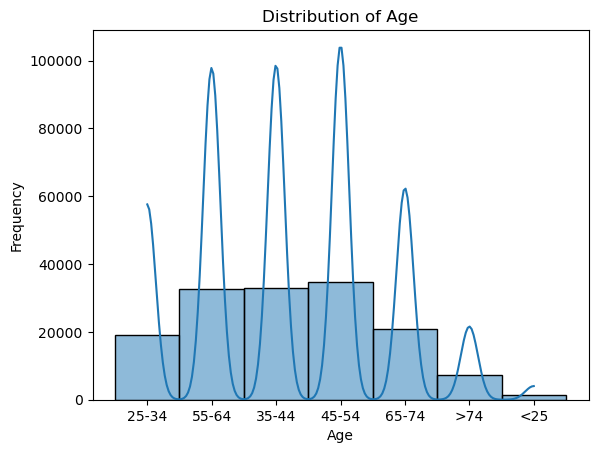

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], bins=10, kde=True, fill=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


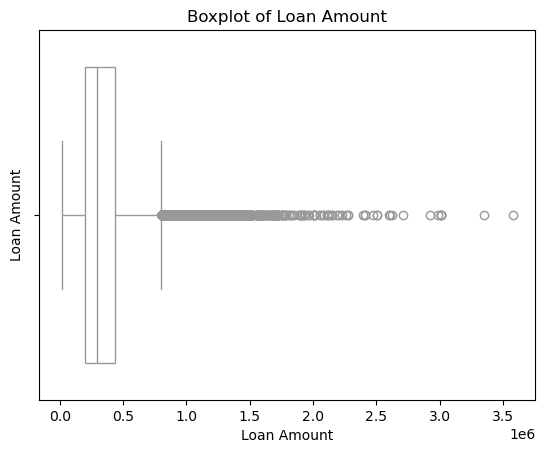

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['loan_amount'], color='white')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount')
plt.title('Boxplot of Loan Amount')
plt.show()


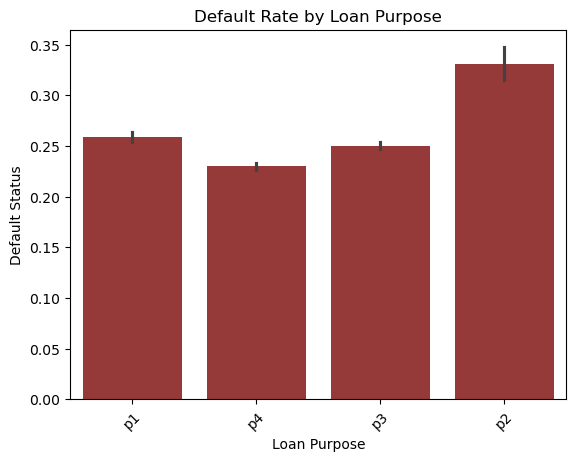

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='loan_purpose', y='status', color='brown')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Status')
plt.title('Default Rate by Loan Purpose')
plt.xticks(rotation=45)
plt.show()


In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['id', 'year', 'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1'],
      dtype='object')

In [22]:
print("OUTLIER COUNT IN EACH NUMERIC COLUMN")
outliers = {}

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
  outliers[col] = outlier_count

outliers

OUTLIER COUNT IN EACH NUMERIC COLUMN


{'id': 0,
 'year': 0,
 'loan_amount': 1895,
 'rate_of_interest': 856,
 'interest_rate_spread': 445,
 'upfront_charges': 2880,
 'term': 26944,
 'property_value': 5266,
 'income': 6546,
 'credit_score': 0,
 'ltv': 1882,
 'status': 36639,
 'dtir1': 2013}

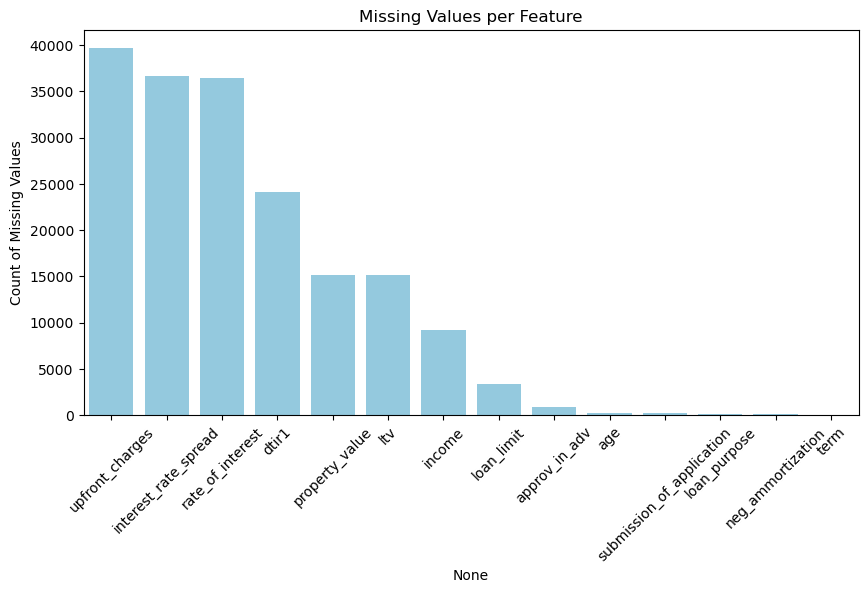

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, color='skyblue')  # use color instead of palette
plt.title("Missing Values per Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()


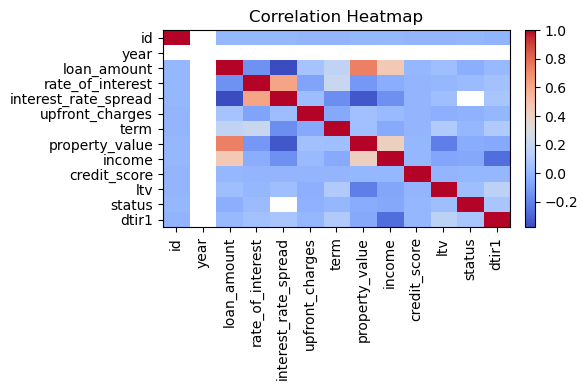

In [25]:
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    plt.figure(figsize=(6,4))
    im = plt.imshow(corr, aspect='auto', cmap="coolwarm")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


In [26]:
outlier_summary = []
for col in numeric_cols:
    s = df[col].dropna()
    if s.empty: 
        continue
    Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    count = ((s < lower) | (s > upper)).sum()
    outlier_summary.append((col, int(count), round(count/len(df),3)))

outlier_df = pd.DataFrame(outlier_summary, columns=["feature","outlier_count","outlier_ratio"])
print("\n📌 Outlier Analysis")
display(outlier_df.sort_values("outlier_ratio", ascending=False).head(20))


📌 Outlier Analysis


,feature,outlier_count,outlier_ratio
11,status,36639,0.246
6,term,26944,0.181
8,income,6546,0.044
7,property_value,5266,0.035
5,upfront_charges,2880,0.019
12,dtir1,2013,0.014
2,loan_amount,1895,0.013
10,ltv,1882,0.013
3,rate_of_interest,856,0.006
4,interest_rate_spread,445,0.003


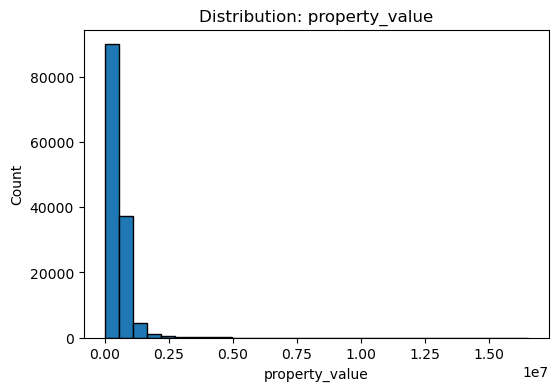

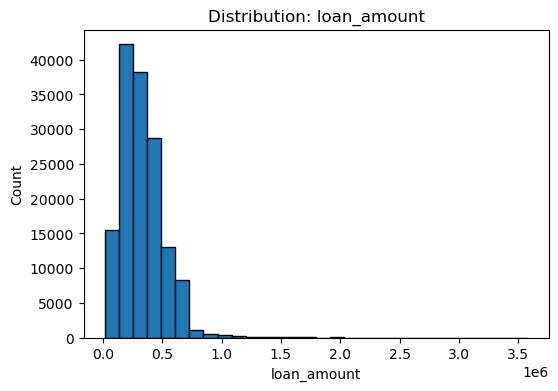

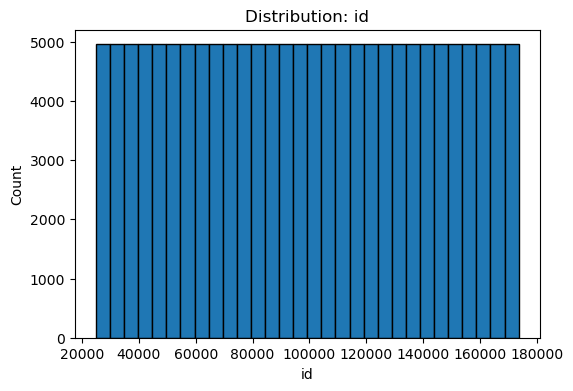

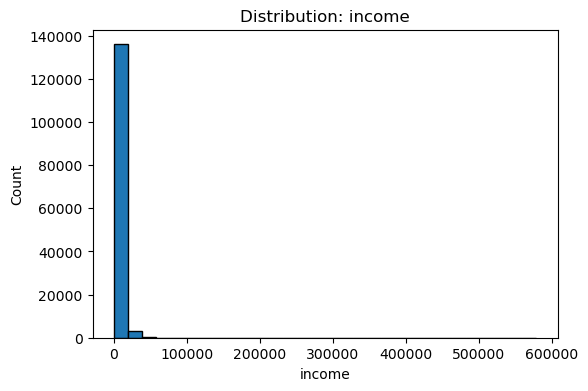

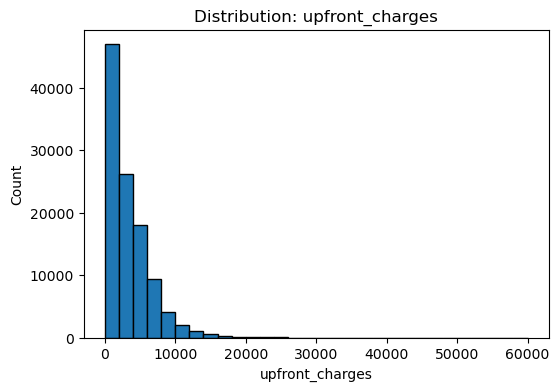

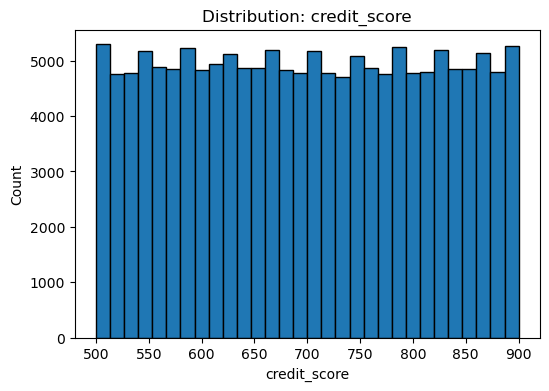

In [27]:
variances = df[numeric_cols].var(numeric_only=True).sort_values(ascending=False)
key_features = variances.index[:min(6, len(variances))].tolist()
for col in key_features:
    plt.figure(figsize=(6,4))
    df[col].dropna().plot(kind="hist", bins=30, edgecolor="black")
    plt.title(f"Distribution: {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

In [28]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

summary_numeric = df[numeric_cols].describe().T
missing = df.isna().mean().sort_values(ascending=False).rename("missing_ratio")

print("\n Summary Statistics (Numeric)")
display(summary_numeric)

print("\n Missing Value Ratios (Top 20)")
display(missing.head(20))


 Summary Statistics (Numeric)


,count,mean,std,min,25%,50%,75%,max
id,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
credit_score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02



 Missing Value Ratios (Top 20)


upfront_charges              0.266644
interest_rate_spread         0.246445
rate_of_interest             0.245100
dtir1                        0.162245
ltv                          0.101554
property_value               0.101554
income                       0.061546
loan_limit                   0.022493
approv_in_adv                0.006107
submission_of_application    0.001345
age                          0.001345
loan_purpose                 0.000901
neg_ammortization            0.000814
term                         0.000276
region                       0.000000
total_units                  0.000000
security_type                0.000000
status                       0.000000
co-applicant_credit_type     0.000000
credit_score                 0.000000
Name: missing_ratio, dtype: float64